In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = []
with open("logs/hsv.txt", "r") as f:
    fold = 1
    epoch = 0
    for line in f:
        epoch += 1
        row = line.strip().split(" | ")
        item = {
            "fold": fold, 
            "epoch": epoch,
            "lr": float(row[0].split(": ")[1]),
            "train_loss": float(row[1].split(": ")[1]),
            "validation_loss": float(row[2].split(": ")[1]),
            "validation_acc": float(row[3].split(": ")[1]),
            "QWKappa": float(row[4].split(": ")[1]),
            "QWKappa_Karolinska": float(row[5].split(": ")[1]),
            "QWKappa_Radboud": float(row[6].split(": ")[1])
        }
        data.append(item)
        
        if epoch % 30 == 0:
            fold += 1
            epoch = 0

In [4]:
df = pd.DataFrame(data=data)

In [5]:
df.head()

,fold,epoch,lr,train_loss,validation_loss,validation_acc,QWKappa,QWKappa_Karolinska,QWKappa_Radboud
0,1,1,0.00003,0.465289,0.377960,43.512451,0.684443,0.664648,0.618847
1,1,2,0.00003,0.486279,0.381387,38.051551,0.675800,0.652944,0.591578
2,1,3,0.00030,0.402695,0.399320,29.314111,0.706872,0.688813,0.651744
3,1,4,0.00003,0.291068,0.286456,48.623853,0.809257,0.814255,0.755289
4,1,5,0.00003,0.265621,0.264827,55.351682,0.824280,0.814533,0.790249


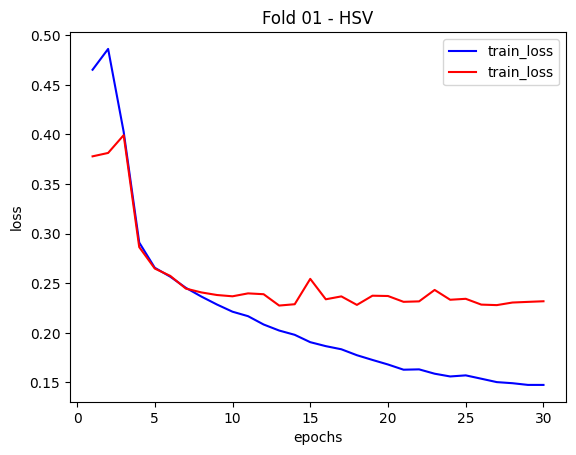

In [6]:
fold_1_data = df[df["fold"] == 1]

plt.figure()
plt.plot(fold_1_data["epoch"], fold_1_data['train_loss'], label="train_loss", color="blue")
plt.plot(fold_1_data["epoch"], fold_1_data['validation_loss'], label="train_loss", color="red")
plt.xlabel('epochs')
plt.ylabel("loss")
plt.legend()
plt.title("Fold 01 - HSV")
plt.show()

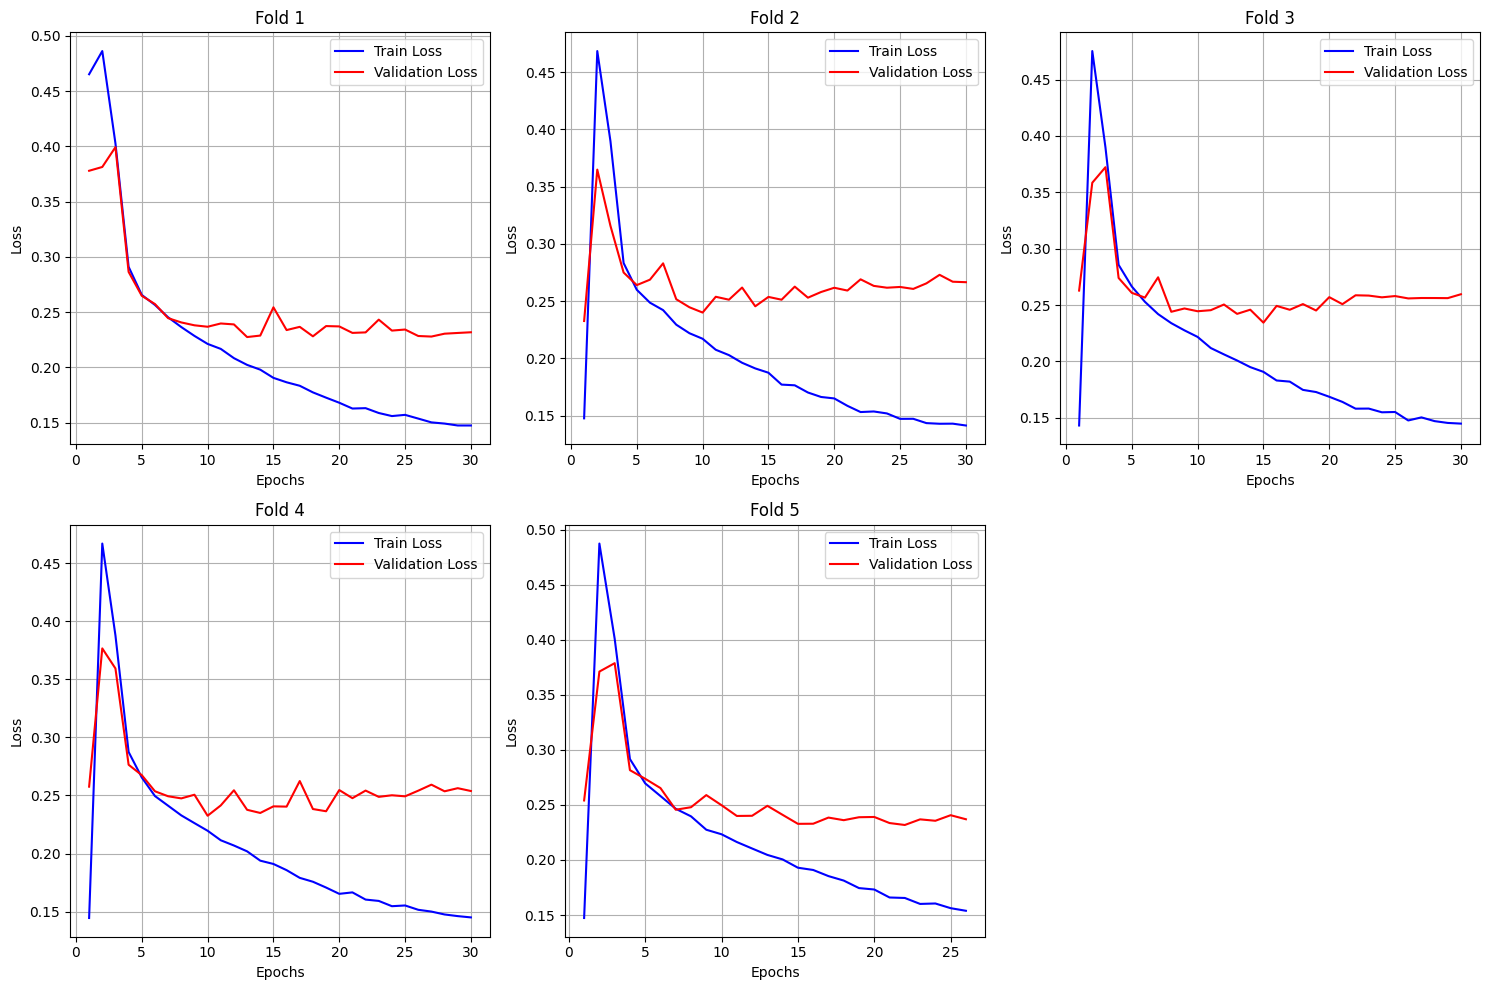

In [9]:
folds = df["fold"].unique()
num_folds = len(folds)
cols = 3  # Número de gráficos por linha
rows = (num_folds + cols - 1) // cols  # Calcula o número de linhas necessárias

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Achatar os eixos para fácil iteração

for idx, fold in enumerate(folds):
    fold_data = df[df["fold"] == fold]
    ax = axes[idx]
    ax.plot(fold_data["epoch"], fold_data["train_loss"], label="Train Loss", color="blue")
    ax.plot(fold_data["epoch"], fold_data["validation_loss"], label="Validation Loss", color="red")
    ax.set_title(f"Fold {fold}")
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True)

# Remove os eixos extras se não forem usados
for i in range(len(folds), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


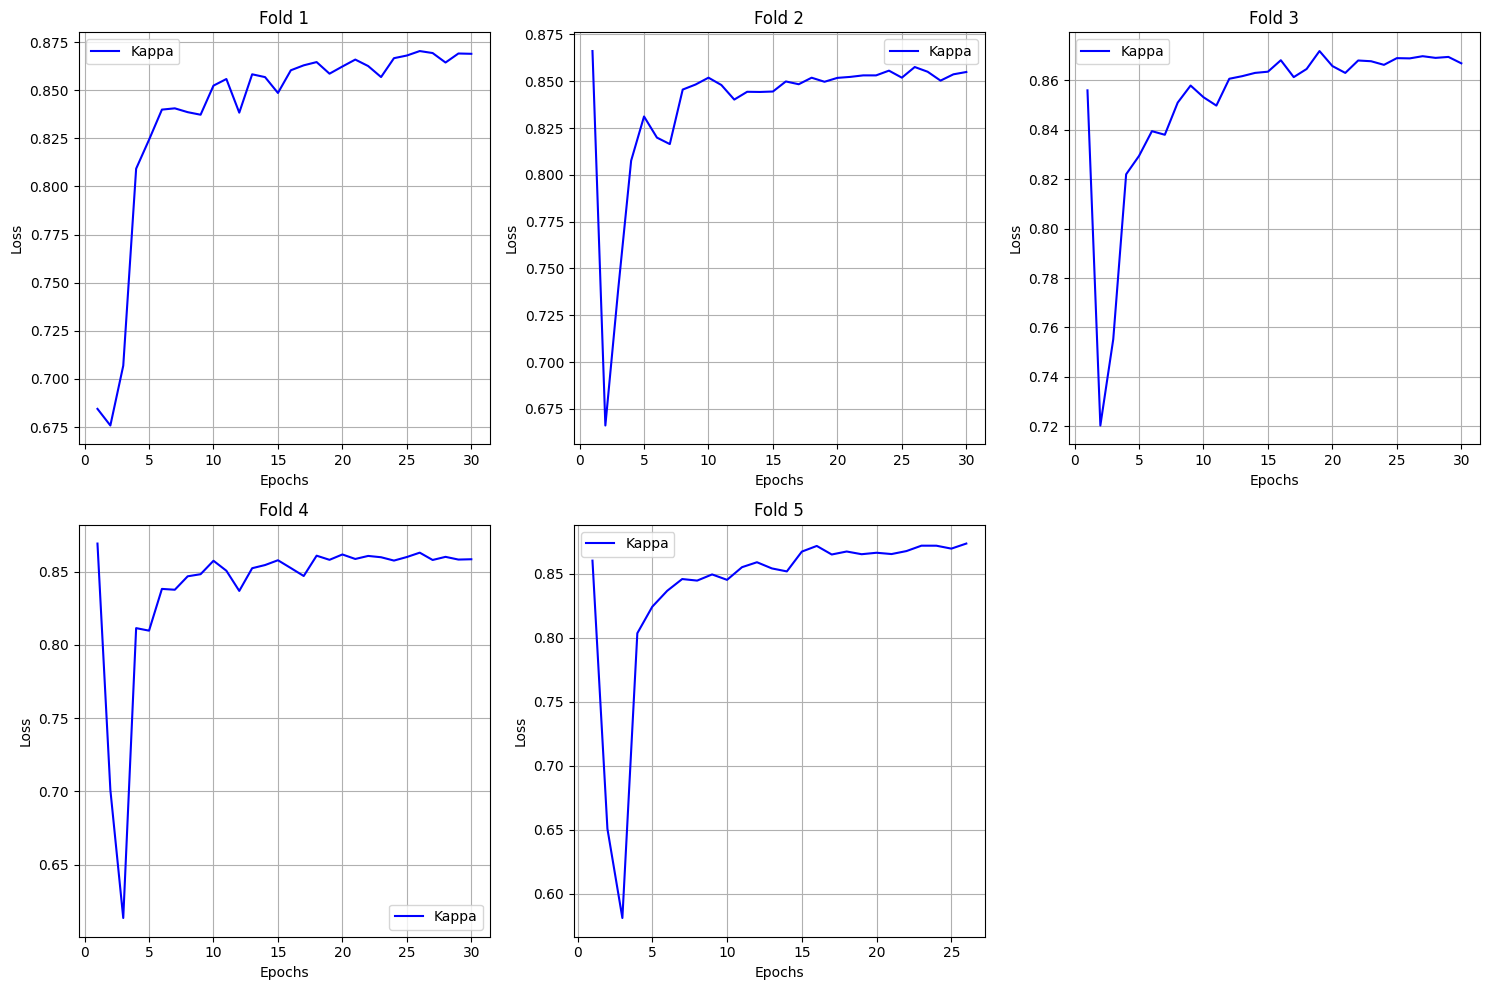

In [10]:
folds = df["fold"].unique()
num_folds = len(folds)
cols = 3  # Número de gráficos por linha
rows = (num_folds + cols - 1) // cols  # Calcula o número de linhas necessárias

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Achatar os eixos para fácil iteração

for idx, fold in enumerate(folds):
    fold_data = df[df["fold"] == fold]
    ax = axes[idx]
    ax.plot(fold_data["epoch"], fold_data["QWKappa"], label="Kappa", color="blue")
    ax.set_title(f"Fold {fold}")
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True)

# Remove os eixos extras se não forem usados
for i in range(len(folds), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
